In [187]:
import os
import matplotlib.pyplot as plt
from collections import Counter

from joblib import dump, load
import time

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import classification_report, accuracy_score


# 读取数据，构造训练集和测试集

In [188]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data_10class.npy')
    y = np.load('train_data/label_10class.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num


In [189]:

def create_train_data(x, y, ratio=0.8):
    """
    x:数据
    y:类别
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（图片的个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(50)
    # !!!一定要设置随机种子，否则每次生成的数据集都是不一样的，训练结果会大幅降低
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val


# 读取数据

In [190]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
# # 从val_data和val_label中拿出最后1个元素作为测试组
# test_data = val_data[-1:]
# test_label = val_label[-1:]
# 
# # 移除val_data和val_label中的最后1个元素
# val_data = val_data[:-1]
# val_label = val_label[:-1]
print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# print("测试组数量：",len(test_label))

类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [191]:
print(train_data[600][0])

[0.44493455 0.00972973 0.09863941 0.4557373 ]



# 数据集构建

In [192]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])
# m_test = test_data.reshape(test_data.shape[0],test_data.shape[1]*test_data.shape[2])
# 设置训练迭代次数
epoch = 20


# 随机森林

In [193]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize


In [194]:

## 模型训练
# 模型参数设置
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5)

# 模型准确率和损失值
acc_list = []
# loss_list = []
train_acc_list = []
print("开始训练")
for i in range(1, epoch + 1):
    # 模型训练
    rfc.fit(m_train, train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val), dtype='int64')

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred), 3)

    # 训练集
    y_pred = np.asarray(rfc.predict(m_train), dtype='int64')
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred), 3)
 
    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)

    # 计算损失值
    # 使用one-hot编码计算损失值
    # noe_hot = OneHotEncoder(sparse_output=False)
    # 
    # y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    # val_label_o = noe_hot.fit_transform(train_label.reshape(1, -1))

    # loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",loss)
    # loss_list.append(loss)
    print("完成第", i, "轮训练，测试集准确率：", acc)

开始训练
完成第 1 轮训练，测试集准确率： 0.936
完成第 2 轮训练，测试集准确率： 0.937
完成第 3 轮训练，测试集准确率： 0.934
完成第 4 轮训练，测试集准确率： 0.932
完成第 5 轮训练，测试集准确率： 0.935
完成第 6 轮训练，测试集准确率： 0.932
完成第 7 轮训练，测试集准确率： 0.937
完成第 8 轮训练，测试集准确率： 0.935
完成第 9 轮训练，测试集准确率： 0.935
完成第 10 轮训练，测试集准确率： 0.937
完成第 11 轮训练，测试集准确率： 0.936
完成第 12 轮训练，测试集准确率： 0.937
完成第 13 轮训练，测试集准确率： 0.936
完成第 14 轮训练，测试集准确率： 0.937
完成第 15 轮训练，测试集准确率： 0.933
完成第 16 轮训练，测试集准确率： 0.936
完成第 17 轮训练，测试集准确率： 0.935
完成第 18 轮训练，测试集准确率： 0.938
完成第 19 轮训练，测试集准确率： 0.935
完成第 20 轮训练，测试集准确率： 0.937


## 测试集得分

In [195]:
y_pred = np.asarray(rfc.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

result=classification_report(val_label, y_pred,output_dict=True)
rfc_info={}
rfc_info['accuracy']=result['accuracy']
rfc_info['precision']=result['macro avg']['precision']
rfc_info['recall']=result['macro avg']['recall']
rfc_info['f1-score']=result['macro avg']['f1-score']


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.937
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       144
           1       1.00      1.00      1.00       150
           2       0.83      0.82      0.83       157
           3       0.98      0.99      0.98       158
           4       0.99      0.93      0.96       164
           5       1.00      1.00      1.00       143
           6       0.75      0.85      0.80       158
           7       1.00      1.00      1.00       132
           8       0.99      0.92      0.95       156
           9       0.93      1.00      0.97       138

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500




## 模型迭代准确率

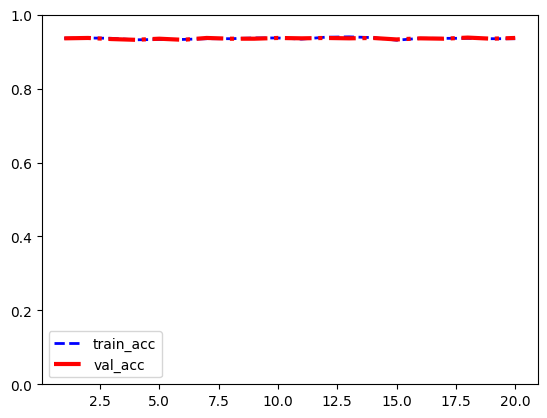

In [196]:
# 设置Y轴范围
plt.ylim(0, 1)
# 训练准确率曲线
show_data1 = train_acc_list
# 测试准确率曲线
show_data2 = acc_list
x_data = list(range(1, len(show_data1) + 1))
ln1, = plt.plot(x_data, show_data1, color='blue', linewidth=2.0, linestyle='--')
ln2, = plt.plot(x_data, show_data2, color='red', linewidth=3.0, linestyle='-.')
plt.legend(handles=[ln1, ln2], labels=['train_acc', 'val_acc'])
plt.show()

## 保存模型

In [197]:

# 保存模型
dump(rfc, 'models_save/rfc_10class.joblib')
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

['models_save/rfc_10class.joblib']

# SVM

In [198]:
from sklearn import svm  # 引入SVM库

# 读取数据

In [199]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])

类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [200]:

# 模型参数设置
svm_model = svm.SVC(kernel='poly', gamma='scale', probability=True, coef0=1,degree=3,C=7)  # SVM模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")
# for i in range(1, epoch + 1):
# 模型训练
svm_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(svm_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
# y_pred_train = np.asarray(svm_model.predict(m_train), dtype='int64')
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
# train_acc_list.append(train_acc)

print("完成SVM训练，测试集准确率：", acc)

开始训练
完成SVM训练，测试集准确率： 0.933


In [201]:
y_pred_final = np.asarray(svm_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final,zero_division=0))

result=classification_report(val_label, y_pred,output_dict=True,zero_division=0)
svm_info={}
svm_info['accuracy']=result['accuracy']
svm_info['precision']=result['macro avg']['precision']
svm_info['recall']=result['macro avg']['recall']
svm_info['f1-score']=result['macro avg']['f1-score']


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.933
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       144
           1       1.00      1.00      1.00       150
           2       0.80      0.85      0.82       157
           3       0.95      0.99      0.97       158
           4       0.99      0.96      0.98       164
           5       1.00      1.00      1.00       143
           6       0.80      0.84      0.81       158
           7       1.00      1.00      1.00       132
           8       0.99      0.88      0.93       156
           9       0.90      1.00      0.95       138

    accuracy                           0.93      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.93      0.93      1500



# 保存模型

In [202]:
dump(svm_model, 'models_save/svm_10class.joblib')
# # 加载
# svm = load('models_save/svm.joblib')
# print(svm)

['models_save/svm_10class.joblib']

# Gaussian Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB

# 读取数据

In [204]:
data, label, label_count = load_data()
# 生成训练集测试集，70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*"*10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))


类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [205]:
# 模型参数设置
gnb_model = GaussianNB()  # Gaussian Naive Bayes 模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")

# 模型训练
gnb_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(gnb_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
# y_pred_train = np.asarray(gnb_model.predict(m_train), dtype='int64')
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
# train_acc_list.append(train_acc)

print("完成训练，测试集准确率：", acc)

开始训练
完成训练，测试集准确率： 0.933


In [206]:
y_pred_final = np.asarray(gnb_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final,zero_division=0))

result=classification_report(val_label, y_pred,output_dict=True,zero_division=0)
gb_info={}
gb_info['accuracy']=result['accuracy']
gb_info['precision']=result['macro avg']['precision']
gb_info['recall']=result['macro avg']['recall']
gb_info['f1-score']=result['macro avg']['f1-score']

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.933
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       144
           1       1.00      1.00      1.00       150
           2       0.85      0.79      0.82       157
           3       0.98      0.99      0.99       158
           4       0.99      0.93      0.96       164
           5       1.00      1.00      1.00       143
           6       0.74      0.86      0.80       158
           7       1.00      1.00      1.00       132
           8       0.99      0.91      0.95       156
           9       0.93      1.00      0.96       138

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.94      0.93      0.93      1500



# 保存模型

In [207]:
dump(gnb_model, 'models_save/gnb_10class_thisisbad.joblib')

['models_save/gnb_10class_thisisbad.joblib']

# KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier  

# 模型参数设置，选择KNN模型  

In [209]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # 你可以根据需要调整邻居的数量  

# 模型准确率列表  
acc_list = []  
train_acc_list = []  
print("开始训练")  
# 模型拟合  
knn_model.fit(m_train, train_label)  

# 测试集  
y_pred = knn_model.predict(m_val)  

# 计算准确率  
acc = round(accuracy_score(val_label, y_pred), 3)  

# 训练集  
# y_pred_train = knn_model.predict(m_train)  
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)  

acc_list.append(acc)  
# train_acc_list.append(train_acc)  

print("完成训练，测试集准确率：", acc)  
print('------------------测试集上得分：------------------------')  
print('*' * 5)  
print('测试集准确率得分:', acc)  
print('*' * 5)  
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred,output_dict=False))  


result=classification_report(val_label, y_pred,output_dict=True)
knn_info={}
knn_info['accuracy']=result['accuracy']
knn_info['precision']=result['macro avg']['precision']
knn_info['recall']=result['macro avg']['recall']
knn_info['f1-score']=result['macro avg']['f1-score']


开始训练
完成训练，测试集准确率： 0.944
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.944
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       144
           1       1.00      1.00      1.00       150
           2       0.84      0.86      0.85       157
           3       0.95      1.00      0.98       158
           4       0.98      0.98      0.98       164
           5       1.00      1.00      1.00       143
           6       0.85      0.87      0.86       158
           7       1.00      1.00      1.00       132
           8       0.99      0.90      0.94       156
           9       0.92      0.99      0.95       138

    accuracy                           0.94      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.94      0.94      0.94      1500



In [210]:
# 保存模型
dump(knn_model, 'models_save/knn_10class.joblib')

['models_save/knn_10class.joblib']

In [224]:
# Ensure you have the right device  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Reading data (implementation needed)  
data, label, label_count = load_data()
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))



Using device: cuda
类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [225]:
# Create datasets and dataloaders  
train_dataset = TensorDataset(torch.tensor(train_data, dtype=torch.float32),
                              torch.tensor(train_label, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(val_data, dtype=torch.float32), torch.tensor(val_label, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [226]:
class CNNModel(nn.Module):  
    def __init__(self):  
        super(CNNModel, self).__init__()  
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=64, kernel_size=1)  # 调整kernel size到1  
        self.pool = nn.MaxPool1d(kernel_size=1)  # 池化层 kernel size  
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # 全局平均池化  
        self.conv2 = nn.BatchNorm1d(64,momentum=0.1)  # BatchNorm
        # self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1)  # 添加第二个卷积层
        self.fc1 = nn.Linear(64, 32)  # 输入是64（卷积层输出通道）  
        self.dropout = nn.Dropout(0.2)  
        self.fc2 = nn.Linear(32, 10)  # 输出为10类  

    def forward(self, x):  
        x = self.conv1(x)  # 卷积层  
        x = torch.relu(x)  # 激活函数ReLU  
        x = self.conv2(x)  # BatchNorm  
        x = self.pool(x)  # 池化层  
        x = self.global_avg_pool(x)  # 全局平均池化  
        # x = self.conv3(x)  # 第二个卷积层

        x = x.view(x.size(0), -1)  # 展平  
        x = self.fc1(x)  # 全连接层  
        x = torch.relu(x)  # 激活函数ReLU  
        x = self.dropout(x)  # Dropout 层  
        x = self.fc2(x)  # 输出层  
        return x  
        # Instantiate the model  

model = CNNModel().to(device)
print("实例化模型成功")
print("模型参数如下：")
print(model)

# Loss and optimizer  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)  # 学习率调度器  


实例化模型成功
模型参数如下：
CNNModel(
  (conv1): Conv1d(4, 64, kernel_size=(1,), stride=(1,))
  (pool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (conv2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


In [227]:
# Training loop  
epochs = 20
t1 = time.time()
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs.permute(0, 2, 1))  # Adjust dimensions for Conv1D  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')
t2 = time.time()
train_time = t2 - t1
print(f'Training time: {t2 - t1:.2f} seconds')

Epoch [1/20], Loss: 1.3231
Epoch [2/20], Loss: 0.8423
Epoch [3/20], Loss: 0.7757
Epoch [4/20], Loss: 0.7348
Epoch [5/20], Loss: 0.6777
Epoch [6/20], Loss: 0.6364
Epoch [7/20], Loss: 0.6201
Epoch [8/20], Loss: 0.6161
Epoch [9/20], Loss: 0.5979
Epoch [10/20], Loss: 0.5641
Epoch [11/20], Loss: 0.5440
Epoch [12/20], Loss: 0.5412
Epoch [13/20], Loss: 0.5393
Epoch [14/20], Loss: 0.5282
Epoch [15/20], Loss: 0.5415
Epoch [16/20], Loss: 0.4956
Epoch [17/20], Loss: 0.4845
Epoch [18/20], Loss: 0.5278
Epoch [19/20], Loss: 0.4919
Epoch [20/20], Loss: 0.4663
Training time: 20.58 seconds


In [228]:
# Evaluation  
model.eval()
with torch.no_grad():
    val_outputs = []
    val_labels = []
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs.permute(0, 2, 1))
        val_outputs.append(outputs.cpu().numpy())
        val_labels.append(labels.cpu().numpy())

    # Convert outputs and labels to numpy arrays  
val_outputs = np.vstack(val_outputs)
print(val_outputs.shape)
print(val_outputs[:10])
val_labels = np.concatenate(val_labels)
print(val_labels[:10])
y_pred = np.argmax(val_outputs, axis=1)

print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_labels, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_labels, y_pred))  

result=classification_report(val_labels, y_pred,output_dict=True)
cnn_info={}
cnn_info['accuracy']=result['accuracy']
cnn_info['precision']=result['macro avg']['precision']
cnn_info['recall']=result['macro avg']['recall']
cnn_info['f1-score']=result['macro avg']['f1-score']
cnn_info['train_time']=train_time

(1500, 10)
[[ -4.6587653   15.897395   -16.730381    -9.253126   -27.641708
    9.6622095  -15.453374     1.7005006  -20.141832   -21.212606  ]
 [  0.5342009   -8.208339     2.876205    -9.375555    -0.10855584
  -10.517792     3.1644351  -16.601707    -1.6670258   -9.3110285 ]
 [  1.8523656   -6.7625265  -10.081546     3.7387104  -24.99237
   -1.1959296   -6.767247     1.720746    -3.9169178   -2.1489112 ]
 [  0.6145663   -8.082349     2.7662737   -8.57884     -0.76655954
  -10.029726     2.9092176  -15.53626     -1.6219134   -8.714903  ]
 [ -3.1380622  -15.133117    -0.19125548 -14.883413     6.2988534
  -12.116408     3.120458   -21.693848     1.237942    -9.341362  ]
 [ -3.4324534   -6.387507   -17.086132    -0.5815713  -25.115704
    2.5856278  -14.057573     6.3067894   -6.3472958   -2.7125213 ]
 [ -9.402312   -27.996672    -6.936188   -18.508753     7.6207333
  -10.273297    -2.943951   -21.747622     3.9436975   -6.2770605 ]
 [ -5.962305   -20.104406   -15.531279    -1.059997  

In [216]:
# Reading data (implementation needed)  
data, label, label_count = load_data()
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))

类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [217]:
import torch.nn.functional as F


class ResidualBlock(nn.Module):
    def __init__(self, filters, conv_size):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(filters, filters, conv_size, padding='same')
        self.bn1 = nn.BatchNorm1d(filters)
        self.conv2 = nn.Conv1d(filters, filters, conv_size, padding='same')
        self.bn2 = nn.BatchNorm1d(filters)

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = F.relu(self.bn1(out))
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = F.relu(out)
        return out


class CNN_ResNet_model(nn.Module):
    def __init__(self, label_num, num_b, data_shape=(1, 4)):
        super(CNN_ResNet_model, self).__init__()
        self.num_blocks = num_b
        self.filters = 64
        self.conv_size = 1
        self.label_num = label_num

        # Initial Conv Layers  
        self.conv1 = nn.Conv1d(data_shape[1], 32, 1)
        self.conv2 = nn.Conv1d(32, 64, 1)

        # Pooling Layer  
        self.pool = nn.MaxPool1d(1)

        # ResNet Blocks  
        self.res_blocks = nn.ModuleList([ResidualBlock(self.filters, self.conv_size) for _ in range(self.num_blocks)])

        # Additional Conv Layer after ResNet Blocks  
        self.conv3 = nn.Conv1d(64, 64, 1)

        # Global Average Pooling  
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # Fully connected layers  
        self.fc1 = nn.Linear(64, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, label_num)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        for block in self.res_blocks:
            x = block(x)

        x = F.relu(self.conv3(x))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer  
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)

        return x
    # 模型参数


model_param = {
    "a_shape": 1,
    "b_shape": 4,
    "label_count": 10,
    "num_b": 5
}

data_shape = (model_param['a_shape'], model_param['b_shape'])
# 模型实例化
model = CNN_ResNet_model(model_param['label_count'], model_param['num_b'], data_shape=data_shape)
# 使用学习率进行训练
# 模型网络结构
print("实例化模型成功，网络结构如下：")
print(model)

# 损失函数和优化器
from torch.utils.data import DataLoader, Dataset


# train_data 和 val_data 需要转换为 PyTorch 能够读取的 Dataset 类，并调整数据的形状  

def preprocess_data(data, target_shape):
    data = np.array(data)
    # target_shape=(sequence_length, channels)  
    data = data.reshape(data.shape[0], target_shape[1], target_shape[0])  # 更改数据形状  
    return data


train_data_processed = preprocess_data(train_data, (model_param['a_shape'], model_param['b_shape']))
val_data_processed = preprocess_data(val_data, (model_param['a_shape'], model_param['b_shape']))


class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)  # Convert to tensor  
        self.labels = torch.tensor(labels, dtype=torch.long)  # Convert to tensor  

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


train_dataset = CustomDataset(train_data_processed, train_label)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = CustomDataset(val_data_processed, val_label)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

data_shape = (model_param['a_shape'], model_param['b_shape'])  # (sequence_length, channels)  
model = CNN_ResNet_model(model_param['label_count'], model_param['num_b'], data_shape=data_shape)

# 定义损失函数和优化器  
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 设置日志输出地址  
log_dir = os.path.join("logs", "ResNet")
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
# 训练模型

num_epochs = 20
train_accuracies = []
val_accuracies = []

t1 = time.time()
model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    model.train()

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct_predictions.double() / len(train_loader.dataset)
    train_accuracies.append(epoch_acc.item())  # 记录训练准确率  

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

    # 评估模型在验证集上的表现  
    model.eval()
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)

    epoch_val_acc = correct_predictions.double() / len(val_loader.dataset)
    val_accuracies.append(epoch_val_acc.item())  # 记录验证准确率  

    print(f"Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {epoch_val_acc:.4f}")

print("Training completed.")
t2 = time.time()
train_time = t2 - t1
# 评估模型  
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(preds.cpu().numpy())

    # 计算各项指标  
print("*****完成预处理，进行模型评估*****")
print('------------------测试集上得分：------------------------')

y_pred = all_predictions
val_labels = val_label  # Assuming val_label is already available  

print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_labels, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_labels, y_pred))  

实例化模型成功，网络结构如下：
CNN_ResNet_model(
  (conv1): Conv1d(4, 32, kernel_size=(1,), stride=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
  (pool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (res_blocks): ModuleList(
    (0): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(1,), stride=(1,), padding=same)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv1d(64, 64, kernel_size=(1,), stride=(1,), padding=same)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(1,), stride=(1,), padding=same)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv1d(64, 64, kernel_size=(1,), stride=(1,), padding=same)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2):

In [218]:
result=classification_report(val_labels, y_pred,output_dict=True)
CNN_resnet_info={}
CNN_resnet_info['accuracy']=result['accuracy']
CNN_resnet_info['precision']=result['macro avg']['precision']
CNN_resnet_info['recall']=result['macro avg']['recall']
CNN_resnet_info['f1-score']=result['macro avg']['f1-score']
CNN_resnet_info['train_time']=train_time

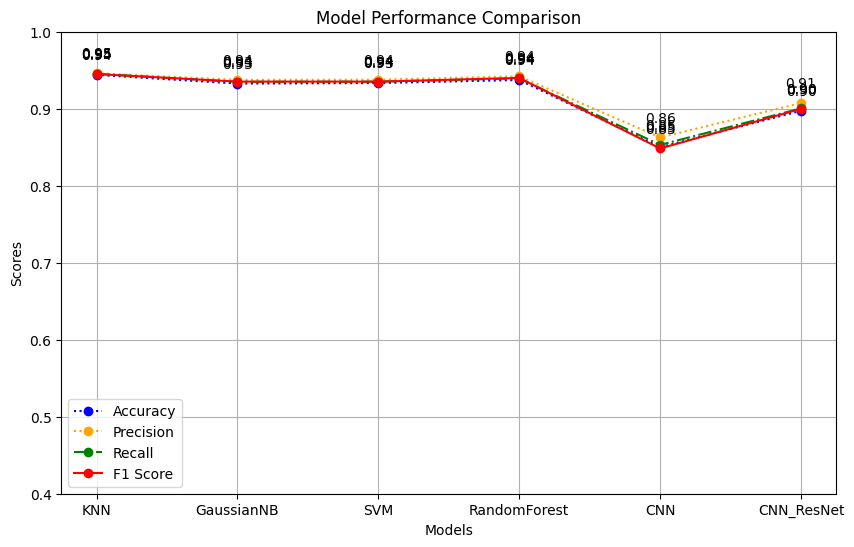

In [229]:
results = {'KNN':knn_info,'GaussianNB':gb_info,'SVM':svm_info,'RandomForest':rfc_info,'CNN':cnn_info,'CNN_ResNet':CNN_resnet_info}

model_names = list(results.keys())  
accuracy = [results[model]['accuracy'] for model in model_names]  
precision = [results[model]['precision'] for model in model_names]  
recall = [results[model]['recall'] for model in model_names]  
f1_score = [results[model]['f1-score'] for model in model_names]  
# train_time=[results[model]['train_time'] for model in model_names]
# 设置 X 轴位置  
x = np.arange(len(model_names))  

# 设置宽度  
width = 0.2  

# 创建图形和轴  
plt.figure(figsize=(10, 6))  

# 绘制折线图  
plt.plot(model_names, accuracy, marker='o', label='Accuracy', linestyle='dotted', color='blue')  
plt.plot(model_names, precision, marker='o', label='Precision', linestyle=':', color='orange')  
plt.plot(model_names, recall, marker='o', label='Recall', linestyle='-.', color='green')  
plt.plot(model_names, f1_score, marker='o', label='F1 Score', linestyle='-', color='red')  
# plt.plot(model_names, train_time, marker='o', label='Train Time', linestyle='--', color='purple')

# 添加标题和标签  
plt.title('Model Performance Comparison')  
plt.xlabel('Models')  
plt.ylabel('Scores')  
plt.ylim(0.40, 1)  

# 图例  
plt.legend()  

# 显示数值标签  
for i, (acc, prec, rec, f1) in enumerate(zip(accuracy, precision, recall, f1_score)):  
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')  
    plt.text(i, prec + 0.02, f'{prec:.2f}', ha='center')  
    plt.text(i, rec + 0.02, f'{rec:.2f}', ha='center')  
    plt.text(i, f1 + 0.02, f'{f1:.2f}', ha='center')  
    # plt.text(i, train_time[i] + 0.02, f'{train_time[i]:.2f}', ha='center')


# 显示图形  
 
plt.grid()  
plt.show()  